In [30]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
import pandas as pd
# Visualize the distributions
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [31]:
# df = pd.read_csv('../FINAL_GEMINI_CHATGPT_filtered_20250430_143607.csv')
# df = pd.read_csv('../generation/gemini/non_ai_doctorat_FINAL_GEMINI_23900_24400_final_20250520_212903.csv')
df = pd.read_csv('../FINAL_GEMINI_CHATGPT_fixed_20250521_174728.csv')
print(len(df))

32158


In [32]:
# Handle potential NaN values in the 'generated' column by dropping rows
df_clean = df.dropna(subset=['generated']).copy() # Use .copy() to avoid SettingWithCopyWarning

# Ensure 'chapter' and 'generated' are strings
df_clean['chapter'] = df_clean['chapter'].astype(str)
df_clean['generated'] = df_clean['generated'].astype(str)


# Create lists of texts and corresponding labels
# Label 0 for original, 1 for AI-generated
texts = df_clean['chapter'].tolist() + df_clean['generated'].tolist()
labels = [0] * len(df_clean) + [1] * len(df_clean)


In [33]:
# Count the number of original and AI-generated texts
original_count = sum(1 for label in labels if label == 0)
ai_generated_count = sum(1 for label in labels if label == 1)

print(f"Number of original texts: {original_count}")
print(f"Number of AI-generated texts: {ai_generated_count}")


Number of original texts: 32158
Number of AI-generated texts: 32158


### Data analysis - Burstiness 

In [34]:
# Basic statistics about text lengths
df_clean['original_length'] = df_clean['chapter'].str.len()
df_clean['generated_length'] = df_clean['generated'].str.len()

print("\nText Length Statistics:")
print("\nOriginal Text Length Statistics:")
print(df_clean['original_length'].describe())
print("\nGenerated Text Length Statistics:")
print(df_clean['generated_length'].describe())

# Calculate average word length
df_clean['original_avg_word_length'] = df_clean['chapter'].str.split().apply(lambda x: np.mean([len(word) for word in x]) if isinstance(x, list) else 0)
df_clean['generated_avg_word_length'] = df_clean['generated'].str.split().apply(lambda x: np.mean([len(word) for word in x]) if isinstance(x, list) else 0)

print("\nAverage Word Length Statistics:")
print("\nOriginal Text Average Word Length:")
print(df_clean['original_avg_word_length'].describe())
print("\nGenerated Text Average Word Length:")
print(df_clean['generated_avg_word_length'].describe())

# Calculate vocabulary diversity (unique words / total words)
def calculate_vocab_diversity(text):
    words = text.split()
    if not words:
        return 0
    return len(set(words)) / len(words)

df_clean['original_vocab_diversity'] = df_clean['chapter'].apply(calculate_vocab_diversity)
df_clean['generated_vocab_diversity'] = df_clean['generated'].apply(calculate_vocab_diversity)

print("\nVocabulary Diversity Statistics:")
print("\nOriginal Text Vocabulary Diversity:")
print(df_clean['original_vocab_diversity'].describe())
print("\nGenerated Text Vocabulary Diversity:")
print(df_clean['generated_vocab_diversity'].describe())

# Calculate punctuation frequency
def calculate_punctuation_freq(text):
    punctuation = sum(1 for char in text if char in '.,!?;:')
    return punctuation / len(text) if len(text) > 0 else 0

df_clean['original_punct_freq'] = df_clean['chapter'].apply(calculate_punctuation_freq)
df_clean['generated_punct_freq'] = df_clean['generated'].apply(calculate_punctuation_freq)

print("\nPunctuation Frequency Statistics:")
print("\nOriginal Text Punctuation Frequency:")
print(df_clean['original_punct_freq'].describe())
print("\nGenerated Text Punctuation Frequency:")
print(df_clean['generated_punct_freq'].describe())


Text Length Statistics:

Original Text Length Statistics:
count    32158.000000
mean      4469.264227
std        899.219221
min       2795.000000
25%       3622.000000
50%       4719.000000
75%       5298.000000
max       5600.000000
Name: original_length, dtype: float64

Generated Text Length Statistics:
count    32158.000000
mean      1779.214659
std       1329.150052
min          3.000000
25%        799.000000
50%       1317.000000
75%       2542.000000
max       9483.000000
Name: generated_length, dtype: float64

Average Word Length Statistics:

Original Text Average Word Length:
count    32158.000000
mean         5.887832
std          0.502888
min          3.952166
25%          5.614505
50%          5.869024
75%          6.128692
max         17.653333
Name: original_avg_word_length, dtype: float64

Generated Text Average Word Length:
count    32158.000000
mean         6.337626
std          3.588501
min          1.888889
25%          5.986118
50%          6.300000
75%          6.6

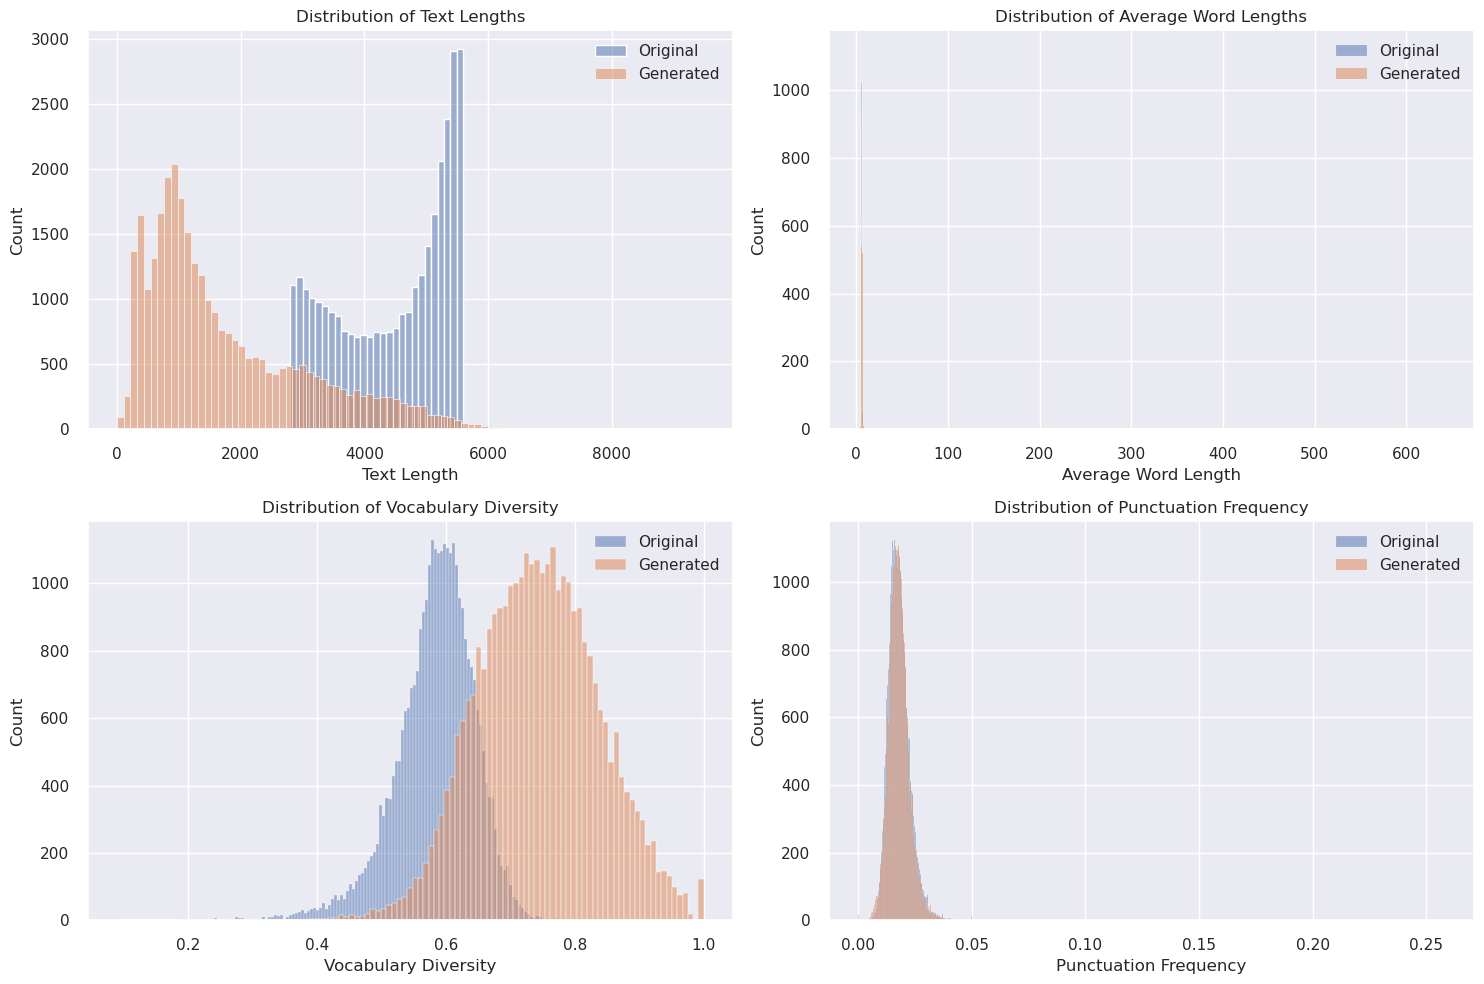

In [35]:


plt.figure(figsize=(15, 10))

# Text length distribution
plt.subplot(2, 2, 1)
sns.histplot(data=df_clean, x='original_length', label='Original', alpha=0.5)
sns.histplot(data=df_clean, x='generated_length', label='Generated', alpha=0.5)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.legend()

# Average word length distribution
plt.subplot(2, 2, 2)
sns.histplot(data=df_clean, x='original_avg_word_length', label='Original', alpha=0.5)
sns.histplot(data=df_clean, x='generated_avg_word_length', label='Generated', alpha=0.5)
plt.title('Distribution of Average Word Lengths')
plt.xlabel('Average Word Length')
plt.legend()

# Vocabulary diversity distribution
plt.subplot(2, 2, 3)
sns.histplot(data=df_clean, x='original_vocab_diversity', label='Original', alpha=0.5)
sns.histplot(data=df_clean, x='generated_vocab_diversity', label='Generated', alpha=0.5)
plt.title('Distribution of Vocabulary Diversity')
plt.xlabel('Vocabulary Diversity')
plt.legend()

# Punctuation frequency distribution
plt.subplot(2, 2, 4)
sns.histplot(data=df_clean, x='original_punct_freq', label='Original', alpha=0.5)
sns.histplot(data=df_clean, x='generated_punct_freq', label='Generated', alpha=0.5)
plt.title('Distribution of Punctuation Frequency')
plt.xlabel('Punctuation Frequency')
plt.legend()

plt.tight_layout()
plt.show()

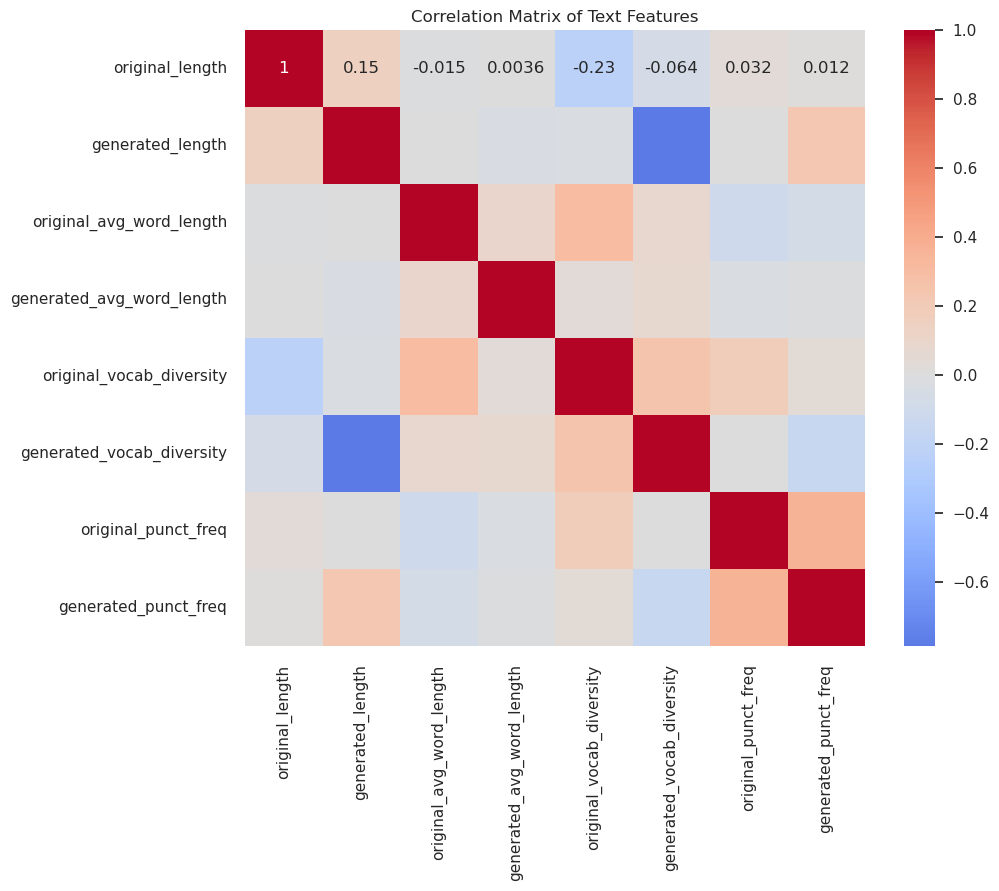

In [36]:
# Correlation analysis
correlation_matrix = df_clean[['original_length', 'generated_length', 
                             'original_avg_word_length', 'generated_avg_word_length',
                             'original_vocab_diversity', 'generated_vocab_diversity',
                             'original_punct_freq', 'generated_punct_freq']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Text Features')
plt.show()

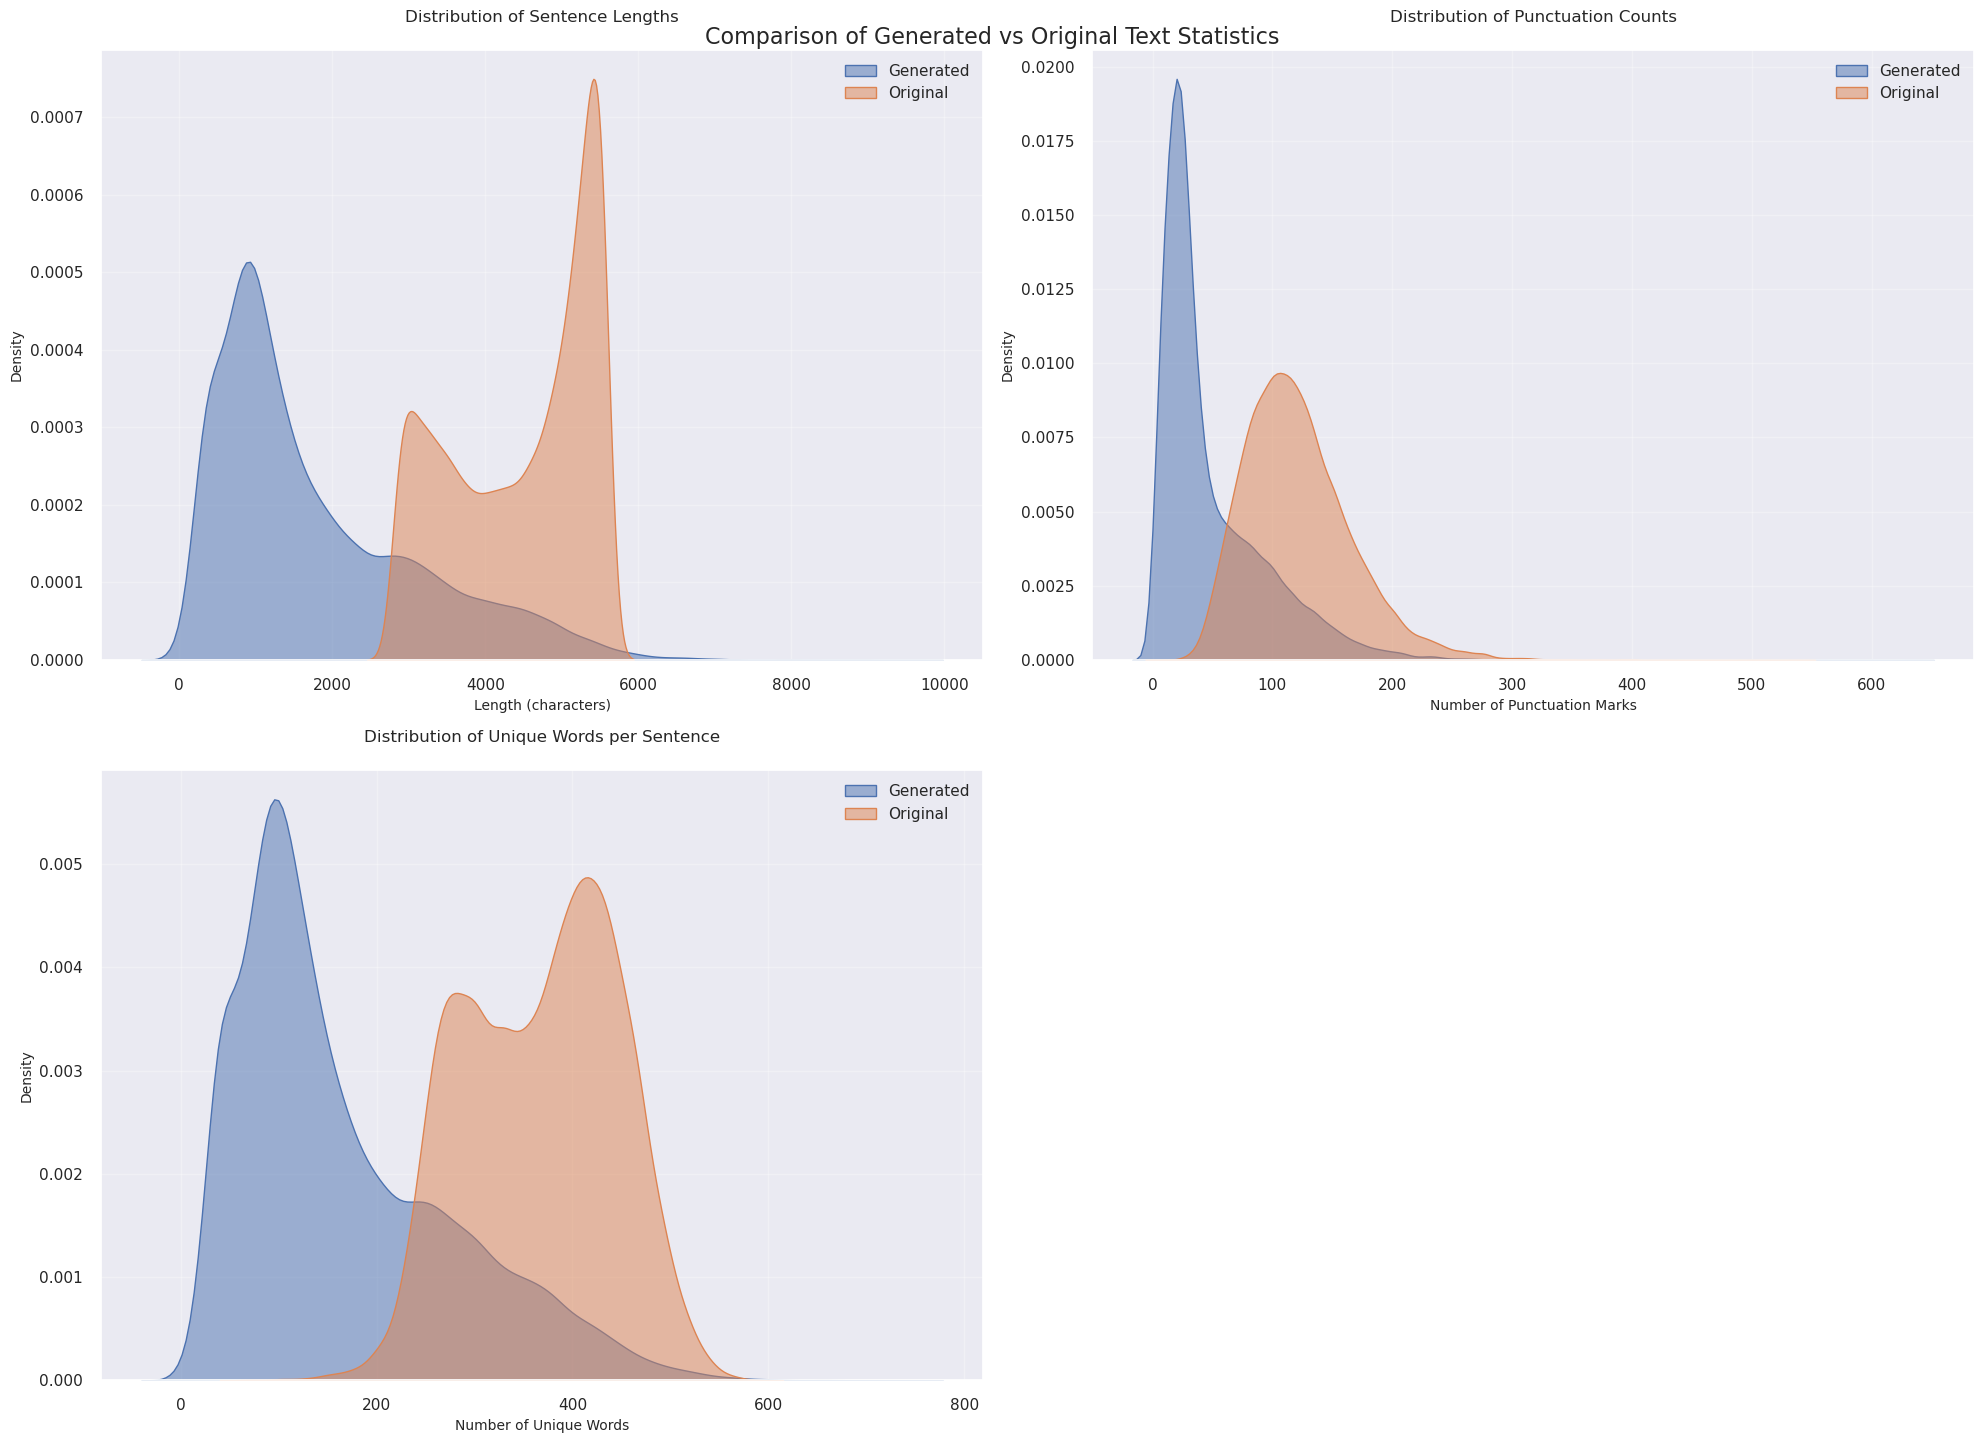

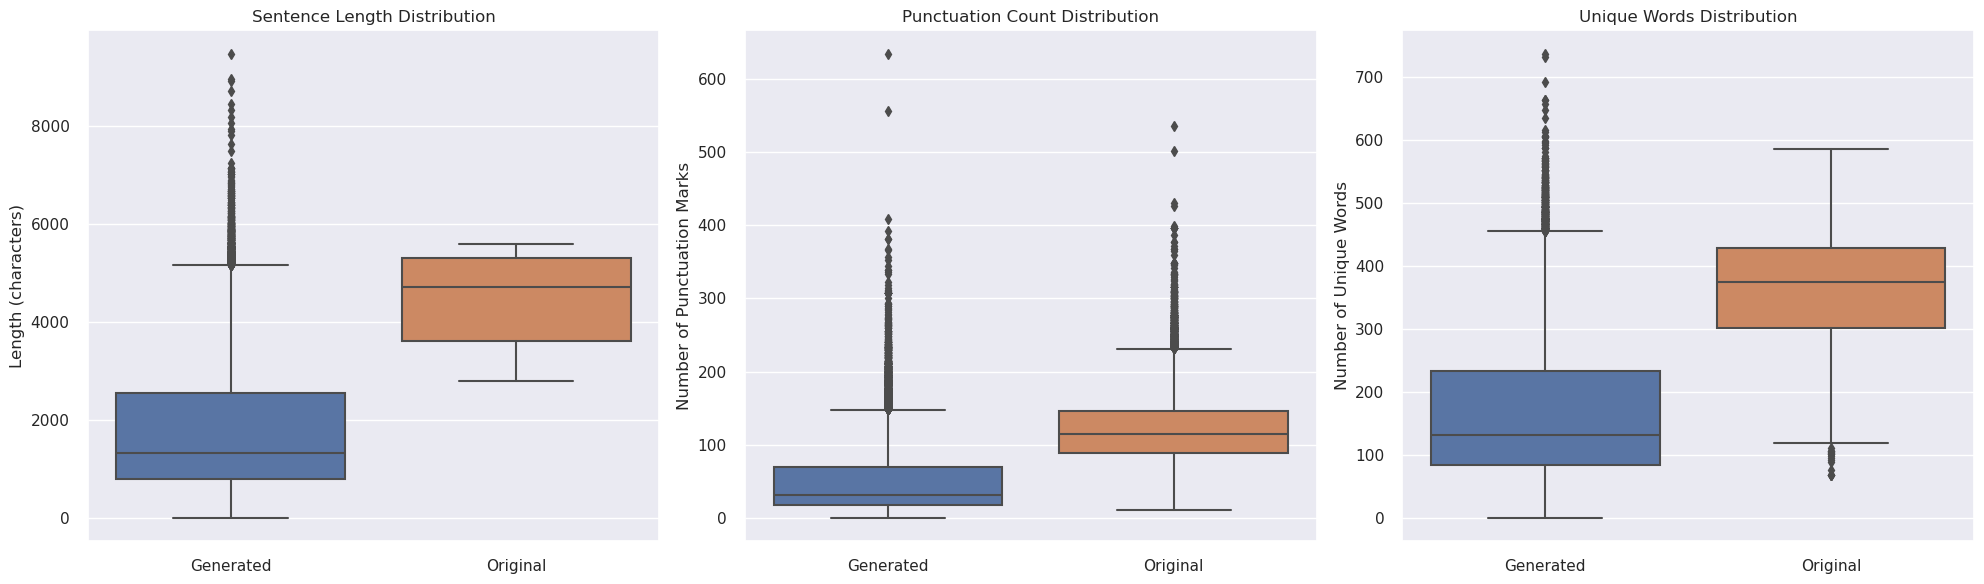


Summary Statistics:

Length Statistics:
Generated:
count    32158.000000
mean      1779.214659
std       1329.150052
min          3.000000
25%        799.000000
50%       1317.000000
75%       2542.000000
max       9483.000000
Name: generated_length, dtype: float64

Original:
count    32158.000000
mean      4469.264227
std        899.219221
min       2795.000000
25%       3622.000000
50%       4719.000000
75%       5298.000000
max       5600.000000
Name: original_length, dtype: float64

Punctuation Statistics:
Generated:
count    32158.000000
mean        49.006655
std         44.921516
min          0.000000
25%         18.000000
50%         31.000000
75%         70.000000
max        635.000000
Name: generated_punctuation, dtype: float64

Original:
count    32158.000000
mean       121.225107
std         44.770631
min         11.000000
25%         89.000000
50%        115.000000
75%        146.000000
max        536.000000
Name: original_punctuation, dtype: float64

Unique_Words Statisti

In [37]:
# Set the style for better-looking plots
plt.style.use('seaborn-v0_8')  # Using a valid style name
sns.set_theme()  # This will set seaborn's default styling


# Function to count punctuation in a text
def count_punctuation(text):
    return len(re.findall(r'[^\w\s]', text))

# Function to count unique words in a text
def count_unique_words(text):
    words = text.lower().split()
    return len(set(words))

# Calculate statistics for both generated and original texts
df_clean['generated_length'] = df_clean['generated'].apply(len)
df_clean['generated_punctuation'] = df_clean['generated'].apply(count_punctuation)
df_clean['generated_unique_words'] = df_clean['generated'].apply(count_unique_words)

df_clean['original_length'] = df_clean['chapter'].apply(len)
df_clean['original_punctuation'] = df_clean['chapter'].apply(count_punctuation)
df_clean['original_unique_words'] = df_clean['chapter'].apply(count_unique_words)

# Create a figure with subplots for comparing distributions
fig = plt.figure(figsize=(20, 15))

# Plot 1: Sentence Length Distribution
plt.subplot(2, 2, 1)
sns.kdeplot(data=df_clean, x='generated_length', label='Generated', fill=True, alpha=0.5)
sns.kdeplot(data=df_clean, x='original_length', label='Original', fill=True, alpha=0.5)
plt.title('Distribution of Sentence Lengths', fontsize=12, pad=20)
plt.xlabel('Length (characters)', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Punctuation Count Distribution
plt.subplot(2, 2, 2)
sns.kdeplot(data=df_clean, x='generated_punctuation', label='Generated', fill=True, alpha=0.5)
sns.kdeplot(data=df_clean, x='original_punctuation', label='Original', fill=True, alpha=0.5)
plt.title('Distribution of Punctuation Counts', fontsize=12, pad=20)
plt.xlabel('Number of Punctuation Marks', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Unique Words Distribution
plt.subplot(2, 2, 3)
sns.kdeplot(data=df_clean, x='generated_unique_words', label='Generated', fill=True, alpha=0.5)
sns.kdeplot(data=df_clean, x='original_unique_words', label='Original', fill=True, alpha=0.5)
plt.title('Distribution of Unique Words per Sentence', fontsize=12, pad=20)
plt.xlabel('Number of Unique Words', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.legend()
plt.grid(True, alpha=0.3)


# Add a main title
fig.suptitle('Comparison of Generated vs Original Text Statistics', fontsize=16, y=0.95)

plt.tight_layout()
plt.show()


# Create a figure with subplots for box plots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Box plot for sentence lengths
sns.boxplot(data=df_clean[['generated_length', 'original_length']], ax=axes[0])
axes[0].set_title('Sentence Length Distribution')
axes[0].set_xticklabels(['Generated', 'Original'])
axes[0].set_ylabel('Length (characters)')

# Box plot for punctuation counts
sns.boxplot(data=df_clean[['generated_punctuation', 'original_punctuation']], ax=axes[1])
axes[1].set_title('Punctuation Count Distribution')
axes[1].set_xticklabels(['Generated', 'Original'])
axes[1].set_ylabel('Number of Punctuation Marks')

# Box plot for unique words
sns.boxplot(data=df_clean[['generated_unique_words', 'original_unique_words']], ax=axes[2])
axes[2].set_title('Unique Words Distribution')
axes[2].set_xticklabels(['Generated', 'Original'])
axes[2].set_ylabel('Number of Unique Words')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
for metric in ['length', 'punctuation', 'unique_words']:
    print(f"\n{metric.title()} Statistics:")
    print("Generated:")
    print(df_clean[f'generated_{metric}'].describe())
    print("\nOriginal:")
    print(df_clean[f'original_{metric}'].describe())



Most common words in Word Cloud of Generated Text:
și: 1.0
sau: 0.3965284684660136
pentru: 0.22722999577639413
de la: 0.1815060561058354
și de: 0.15087810128479365
au fost: 0.13534613131326895
precum și: 0.1313813916100113
în care: 0.11952804610542665
De asemenea: 0.10567189394661908
și în: 0.10349196833658052


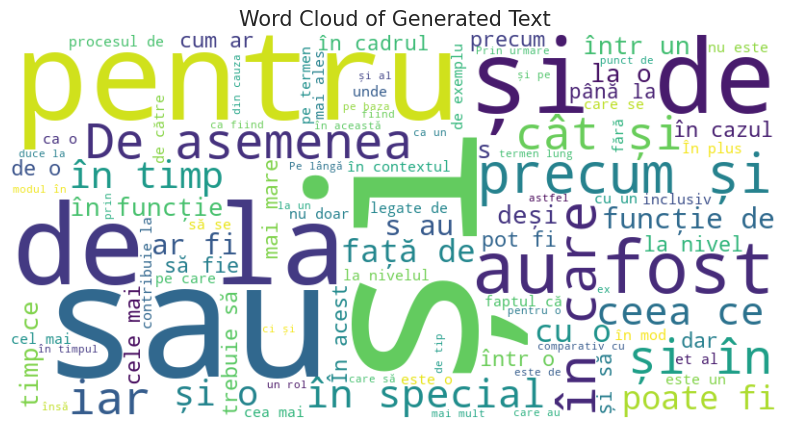


Most common words in Word Cloud of Original Text:
și: 1.0
sau: 0.46371952889619283
de la: 0.4445028759244043
au fost: 0.36195015064365926
în care: 0.3457244590523144
și de: 0.28046014790468365
ceea ce: 0.24559846617365105
pe care: 0.2163790742262394
care se: 0.20875376609148177
în cazul: 0.20123801698164887


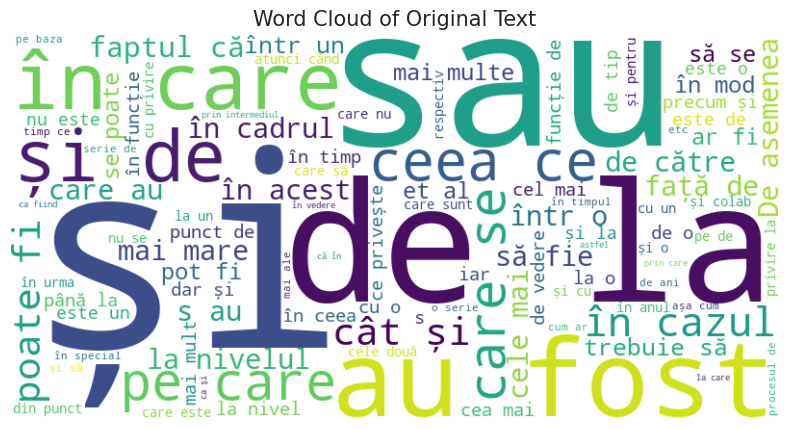

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create word clouds for both generated and original text
def create_wordcloud(text, title):
    # Combine all text into a single string
    combined_text = ' '.join(text)
    
    # Create and generate a word cloud image
    wordcloud = WordCloud(width=800, height=400, 
                         background_color='white',
                         max_words=100,
                         contour_width=3,
                         contour_color='steelblue').generate(combined_text)
    
    
    # Get the most common words
    word_freq = wordcloud.words_
    sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
    print(f"\nMost common words in {title}:")
    for word, freq in sorted_words[:10]:  # Print top 10 words
        print(f"{word}: {freq}")
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=15)
    plt.show()

# Generate word clouds
create_wordcloud(df_clean['generated'], 'Word Cloud of Generated Text')
create_wordcloud(df_clean['chapter'], 'Word Cloud of Original Text')


### perplexity?

In [39]:
# # compute perplexity of the generated and orgianlly text
# from transformers import AutoModelForCausalLM, AutoTokenizer
# import torch
# import numpy as np

# def compute_perplexity(text, model, tokenizer):
#     # Tokenize the text without padding
#     encodings = tokenizer(text, return_tensors='pt', truncation=True, max_length=128)
    
#     # Calculate perplexity
#     with torch.no_grad():
#         outputs = model(**encodings, labels=encodings['input_ids'])
#         loss = outputs.loss
#         perplexity = torch.exp(loss).item()
    
#     return perplexity

# # Load pre-trained Romanian BERT model and tokenizer
# model_name = "dumitrescustefan/bert-base-romanian-cased-v1"
# tokenizer = AutoTokenizer.from_pretrained(model_name)
# model = AutoModelForCausalLM.from_pretrained(model_name)

# # Compute perplexity for original and generated texts
# original_perplexities = []
# generated_perplexities = []

# # Process texts in batches to avoid memory issues
# batch_size = 50
# n_batches = 10
# for i in range(0, batch_size * n_batches, batch_size):
#     batch_original = df_clean['chapter'].iloc[i:i+batch_size]
#     batch_generated = df_clean['generated'].iloc[i:i+batch_size]
    
#     for text in batch_original:
#         try:
#             perplexity = compute_perplexity(text, model, tokenizer)
#             if not np.isnan(perplexity) and not np.isinf(perplexity):  # Check for valid perplexity
#                 original_perplexities.append(perplexity)
#         except Exception as e:
#             print(f"Error processing original text: {str(e)}")
#             continue
            
#     for text in batch_generated:
#         try:
#             perplexity = compute_perplexity(text, model, tokenizer)
#             if not np.isnan(perplexity) and not np.isinf(perplexity):  # Check for valid perplexity
#                 generated_perplexities.append(perplexity)
#         except Exception as e:
#             print(f"Error processing generated text: {str(e)}")
#             continue

# # Only create visualization if we have valid data
# if original_perplexities and generated_perplexities:
#     plt.figure(figsize=(10, 6))
#     plt.hist(original_perplexities, alpha=0.5, label='Original', bins=30)
#     plt.hist(generated_perplexities, alpha=0.5, label='Generated', bins=30)
#     plt.title('Distribution of Perplexity Scores')
#     plt.xlabel('Perplexity')
#     plt.ylabel('Frequency')
#     plt.legend()
#     plt.show()

#     # Print summary statistics
#     print("\nPerplexity Statistics:")
#     print("\nOriginal Text:")
#     print(f"Mean: {np.mean(original_perplexities):.2f}")
#     print(f"Median: {np.median(original_perplexities):.2f}")
#     print(f"Std: {np.std(original_perplexities):.2f}")

#     print("\nGenerated Text:")
#     print(f"Mean: {np.mean(generated_perplexities):.2f}")
#     print(f"Median: {np.median(generated_perplexities):.2f}")
#     print(f"Std: {np.std(generated_perplexities):.2f}")
# else:
#     print("No valid perplexity scores were computed. Check the input data and model.")
